<a href="https://colab.research.google.com/github/clysdid/BigContest_Advanced_2023/blob/master/1_ML_ticket_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

# 선형 회귀 분석


## 모든 변수 활용

### Data

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/예술의전당/통계분석후데이터(코로나제거).csv',index_col=0)
df.head()

In [ ]:
df[df.segment_멤버십소지자==1]['seat']

In [ ]:
df.info()

In [ ]:
x = df.drop(['pay'],axis=1).values
y = df.pay.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=12)
print('Shape of x train : ', x_train.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (200113, 24)
Shape of y train :  (200113,)
Shape of x test :  (85764, 24)
Shape of y test :  (85764,)


In [ ]:
lr_model = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [ ]:
lr_model.fit(x_train,y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

Ridge()

In [ ]:
score_lr = lr_model.score(x_test,y_test)
score_lasso = lasso.score(x_test,y_test)
score_ridge = ridge.score(x_test,y_test)
print('선형 회귀 결정 계수 : ',score_lr)
print('Lasso 결정 계수 : ',score_lasso)
print('Ridge 결정 계수 : ',score_ridge)

선형 회귀 결정 계수 :  0.7263886656761696
Lasso 결정 계수 :  0.7263889206324411
Ridge 결정 계수 :  0.7263890192839944


In [ ]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

In [ ]:
rmse_lr = mean_squared_error(y_test, y_pred_lr)**0.5
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)**0.5
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)**0.5
print('Linear regression RMSE : ',rmse_lr)
print('Lasso RMSE : ',rmse_lasso)
print('Ridge RMSE : ',rmse_ridge)

Linear regression RMSE :  34720.2701706985
Lasso RMSE :  34720.20777224013
Ridge RMSE :  34720.24728614469


In [ ]:
def get_top_bottom_coef(model, n=10):
  coef = pd.Series(model.coef_, index=df.drop('pay',axis=1).columns)

  # 상위 10개, 하위 10개의 회귀계수 추출 후 반환
  coef_high = coef.sort_values(ascending=False).head(n)
  coef_low = coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

In [ ]:
def one_visualize_coefficient(model):
  # 3개 모델 시각화

  fig, axs = plt.subplots(figsize=(12, 5), nrows=1)
  fig.tight_layout()

  # 회귀계수 시각화

  coef_high, coef_low = get_top_bottom_coef(model)
  coef_concat=pd.concat([coef_high, coef_low])

    # 막대그래프 표현
  # axs[0].set_title(model.__class__.__name__+' Coefficient', size=25)
  # axs[0].tick_params(axis="y", direction='in', pad=-100)
  # for label in (axs[0].get_xticklabels() +  axs[0].get_yticklabels()):
  #   label.set_fontsize(15)
  sns.barplot(x=coef_concat.values, y = coef_concat.index)

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


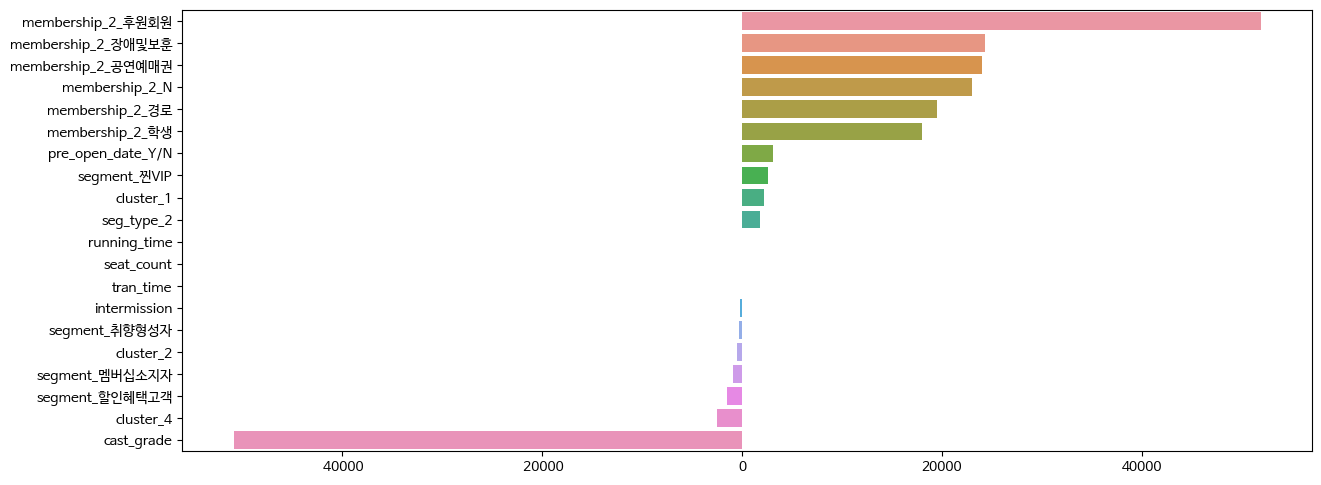

In [ ]:
one_visualize_coefficient(ridge)

# XGBoost


### Data

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
import xgboost
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/예술의전당/XGBoost.csv',index_col=0)
df.head()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/예술의전당/concat_df_0907_f.csv')

In [ ]:
df.performance_code.nunique()

703

In [ ]:
x = df.drop('pay',axis=1)
y = df.pay

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=12)
print('Shape of x train : ', x_train.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (200113, 28)
Shape of y train :  (200113,)
Shape of x test :  (85764, 28)
Shape of y test :  (85764,)


In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
score = xgb.score(x_test,y_test)
print('결정 계수 : ',score)

결정 계수 :  0.990661484179023


In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_pred)**0.5
print('RMSE : ',RMSE)

RMSE :  6406.894706771675


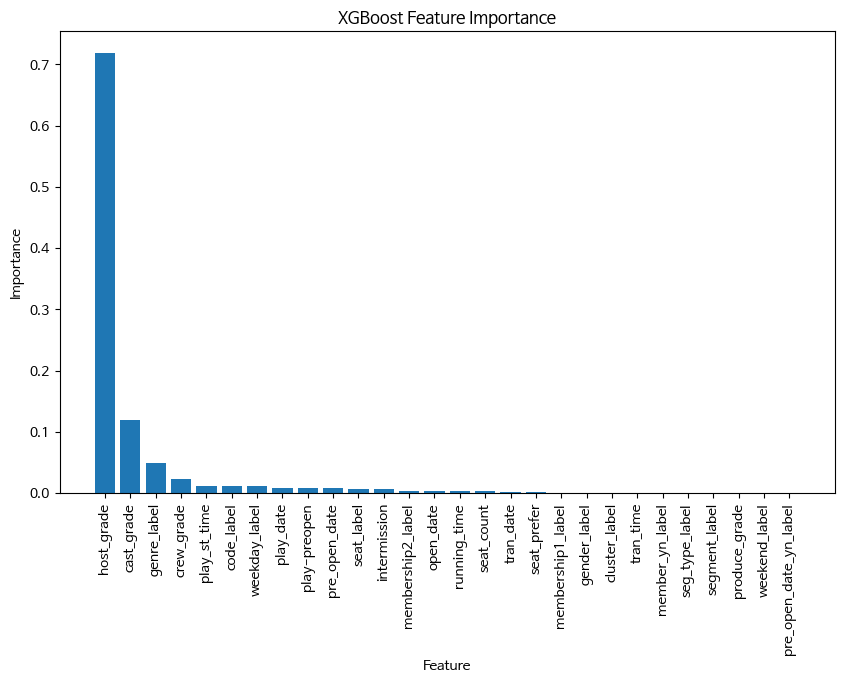

In [ ]:
import matplotlib.pyplot as plt

# 모델을 학습한 후
xgb.fit(x_train, y_train)

# feature importance를 얻어옴
importance = xgb.feature_importances_

# 각 feature의 이름을 가져오기
feature_names = df.columns.tolist()
feature_names.remove('pay')  # 'pay' 열을 feature_names 리스트에서 제거

# 중요도를 feature name과 매핑
feature_importance_mapping = dict(zip(feature_names, importance))

# 중요도를 내림차순으로 정렬
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)

# 중요도를 그래프로 표시
sorted_features, sorted_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()

## SHAP value

In [ ]:
!pip install shap

In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(x_train)

In [ ]:
df.columns

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


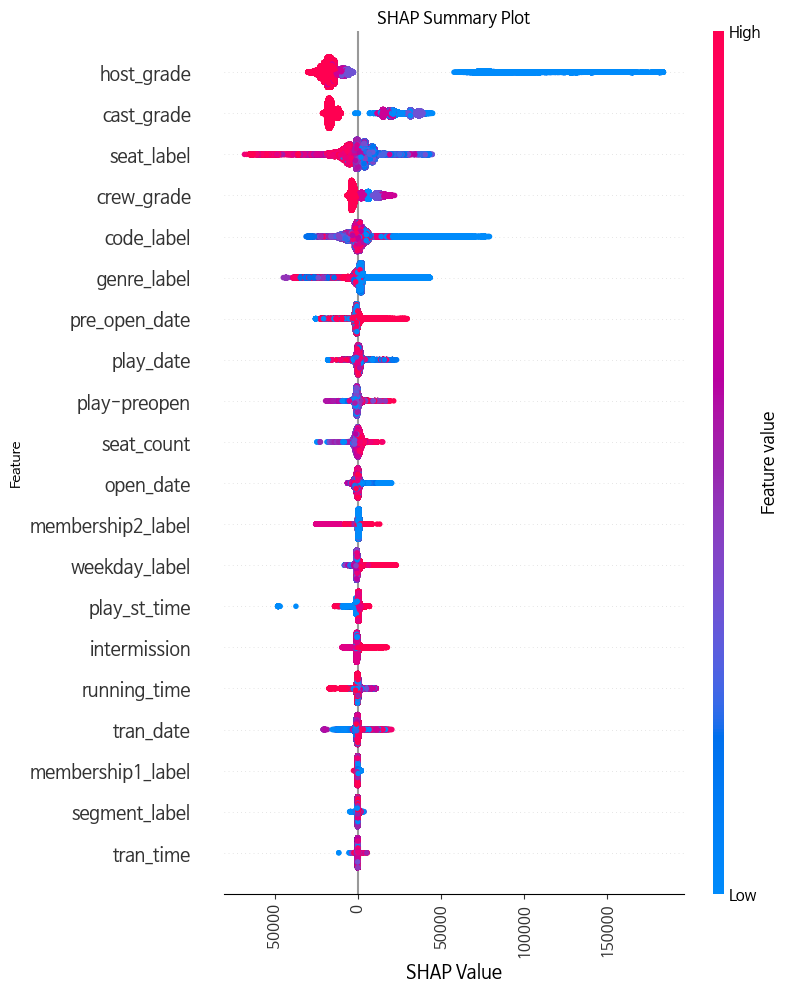

In [ ]:
# 각 feature의 이름을 가져오기
feature_names = df.columns.tolist()
feature_names.remove('pay')  # 'pay' 열을 feature_names 리스트에서 제거

# ]SHAP summary plot 그리기
shap.summary_plot(shap_values, x_train, feature_names=feature_names, show=False)

# 그래프 재구성
plt.xticks(rotation=90)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Summary Plot")
plt.show()

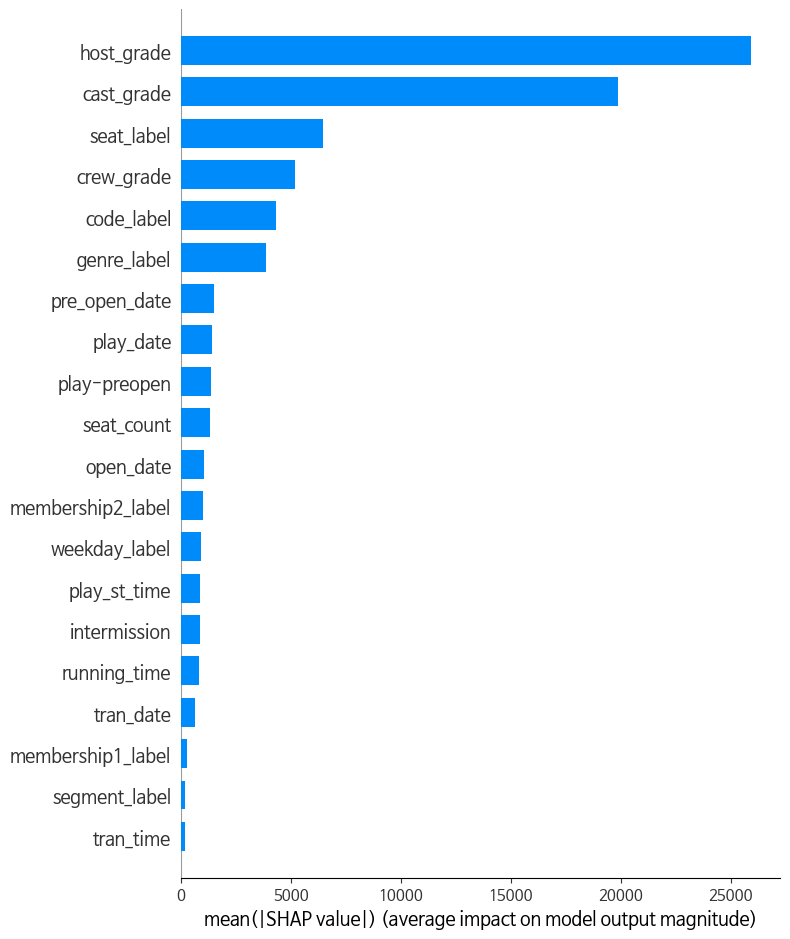

In [ ]:
shap.summary_plot(shap_values, feature_names=feature_names, show=False, plot_type = 'bar')